 # **Data Science and Business Analytics Tasks**
## **Graduate Rotational Internship Program - The Sparks Foundation** 
###   **TASK 2 :** Prediction using Unsupervised ML
<br> 
    
* From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.  <br/>
<br>
* **Libraries imported:** Numpy, Pandas, Seaborn, Scikit Learn <br/>
<br>
* **Given Dataset:** Iris Dataset <br/>
### **Name: Sai Srushti Kasturi**


 **Links:**
 * **Github**: https://github.com/saisrushtikasturi/Graduate-Rotational-Internship-Program---The-Sparks-Foundation.git
 * **Youtube**: https://youtu.be/UWsP6IhXHnI
 * **Dataset**:  https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

In [66]:
#Load and import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

#### This the below code, loading the given 'Iris' dataset and displaying the first five rows of the data <font/>

In [67]:
#Read and load the given iris dataset
data = datasets.load_iris()
data = pd.DataFrame(data.data, columns = data.feature_names)
#display the first five rows of the data
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
#Display the number of rows and columns
data.shape

(150, 4)

In [69]:
#To check for null values present in the given data
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [70]:
#Display the summary statistics of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


#### To check for Outliers by plotting boxplots

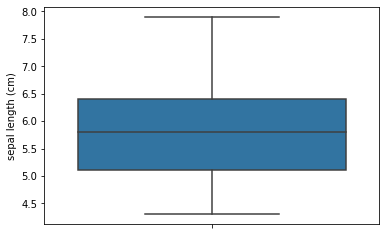

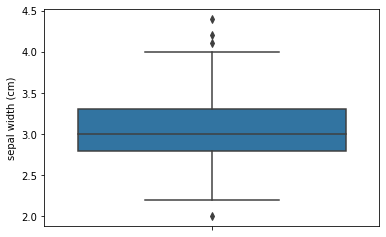

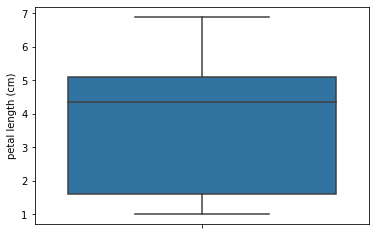

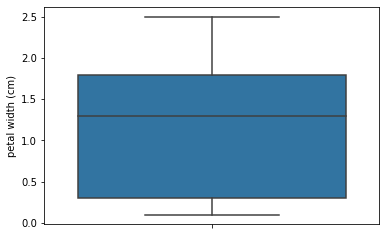

In [71]:
#Plotting a boxplot to check for outliers
column = data.columns
for s in column:
    sns.boxplot(y=data[s])
    plt.show()

#### Removing outliers and checking the the number of rows and column present after removing the outliers

In [72]:
# To remove outliers from 'sepal width (cm)'
quantile1 = data['sepal width (cm)'].quantile(0.25)
quantile3 = data['sepal width (cm)'].quantile(0.75)
IQR = quantile3 - quantile1
data = data[(data['sepal width (cm)'] >= quantile1-1.5*IQR) & (data['sepal width (cm)'] <= quantile3+1.5*IQR)]
data.shape 

(146, 4)

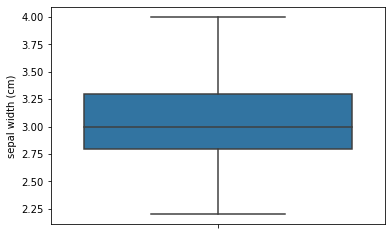

In [73]:
# Plotting Boxplot after removing the outlier for sepal width (cm) 
sns.boxplot(y=data['sepal width (cm)'])
plt.show()

#### Standardizing in order to avoid bias 
#### Determining the value of K and finding the optimal number of clusters froom the range of clusters for K-Means

In [74]:
# Standardize to avoid bias

standard_scaler = StandardScaler()
data_tranform = standard_scaler.fit_transform(data)

#Finding the optimal number of clusters
rangeofclusters = range(1,20)
errorsinclusters = []

for numberofclusters in rangeofclusters:
    Kcl = KMeans(numberofclusters, n_init = 10)
    Kcl.fit(data_tranform)
    clusterlabels = Kcl.labels_
    centroids = Kcl.cluster_centers_
    errorsinclusters.append(Kcl.inertia_)
    
clustersdata = pd.DataFrame({'numberofclusters': rangeofclusters, 'errorsinclusters': errorsinclusters})
clustersdata[0:20]

,numberofclusters,errorsinclusters
0,1,584.000000
1,2,217.499302
2,3,134.345832
3,4,109.767399
4,5,88.927558
5,6,77.731235
6,7,68.873119
7,8,59.154066
8,9,52.542552
9,10,47.999012


####  Plotting the elbow curve using distortion to find the number of clusters

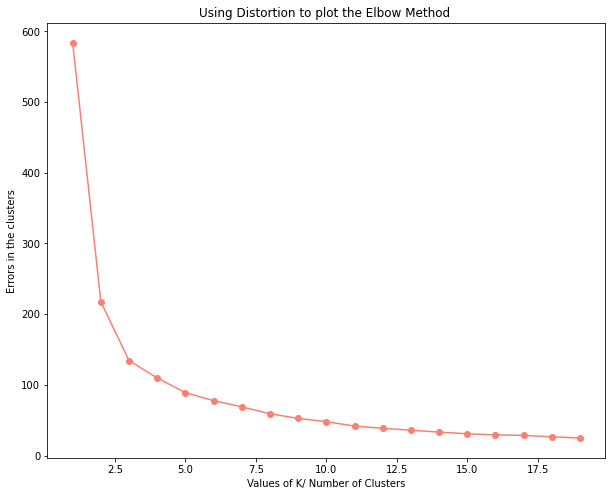

In [75]:
#To plot the elbow curve to find the number of clusters
plt.figure(figsize=(10,8))
plt.plot(clustersdata.numberofclusters, clustersdata.errorsinclusters, marker = 'o',c='salmon') 
plt.xlabel('Values of K/ Number of Clusters') 
plt.ylabel('Errors in the clusters') 
plt.title('Using Distortion to plot the Elbow Method ') 
plt.show() 

#### Applying K-means to the dataset, creating the k-means classifier and VIsualizing the clusters

In [76]:
# To apply kmeans to the dataset and create the kmeans classifier

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_tranform)

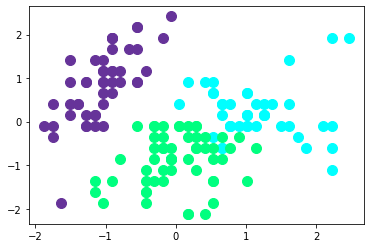

In [77]:
#To visualize the clusters 
plt.scatter(data_tranform[y_kmeans == 0, 0], data_tranform[y_kmeans == 0, 1], 
            s = 100, c = 'rebeccapurple', label = 'Iris-versicolour')
plt.scatter(data_tranform[y_kmeans == 2, 0], data_tranform[y_kmeans == 2, 1],
            s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(data_tranform[y_kmeans == 1, 0], data_tranform[y_kmeans == 1, 1], 
            s = 100, c = 'springgreen', label = 'Iris-virginica')

#### Plotting the centroids of the clusters

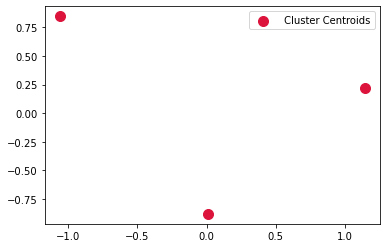

In [78]:
# To plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'crimson', label = ' Cluster Centroids')

plt.legend()

#### Combining Graphs 1 and 2, the visualized clusters and the plotted centroids to form one graph that represents both clusters and centroids of the clusters

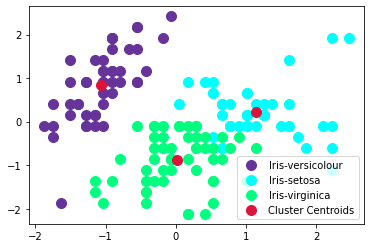

In [79]:
#To visualize the clusters 
plt.scatter(data_tranform[y_kmeans == 0, 0], data_tranform[y_kmeans == 0, 1], 
            s = 100, c = 'rebeccapurple', label = 'Iris-versicolour')
plt.scatter(data_tranform[y_kmeans == 2, 0], data_tranform[y_kmeans == 2, 1],
            s = 100, c = 'cyan', label = 'Iris-setosa')
plt.scatter(data_tranform[y_kmeans == 1, 0], data_tranform[y_kmeans == 1, 1], 
            s = 100, c = 'springgreen', label = 'Iris-virginica')
# To plot the cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'crimson', label = 'Cluster Centroids')


plt.legend()